<h1 align="center">DS200 - Lec21: Principle Component Analysis (PCA)</h1>

## Introduction:

PCA as a dimensionality reduction algorithm has two main use cases in machine learning: 1) data visualization; 2) reduce the data dimensionality to avoid **overfitting** and to **speed up** the algorithm. 

## Section 1: Import Libraries and Load the Data

#### Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Load the given dataset to a DataFrame

In [2]:
# Dataset URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

In [3]:
# loading dataset into Pandas DataFrame
df = pd.read_csv(url, 
                names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'target'])



In [4]:
# Display the top 5 records
df.head()

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Section 2: Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales. Although, all features in the Iris dataset were measured in centimeters, let us continue with the transformation of the data onto unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

#### Import StandardScaler

In [5]:
from sklearn.preprocessing import StandardScaler



#### Prepare the X feature matrix and y label vector

In [6]:
X = df.drop(labels='target', axis=1)


y = df['target']



#### Train the scaler and transform X with the scaler. 

In [8]:
X = StandardScaler().fit_transform(X)

## Section 3: PCA Projection to 2D

#### Import PCA

In [9]:
from sklearn.decomposition import PCA

#### Create a PCA object with 2 PCs. 

In [11]:
pca = PCA(n_components=2, random_state=101)



#### Obtain the PCs. 

In [12]:
principalComponents = pca.fit_transform(X)



#### Create a new DataFrame with the generated PCs. 

In [13]:
principalDf = pd.DataFrame(data=principalComponents, 
                           columns=['PC  1', 'PC 2'])



In [14]:
principalDf.head(5)

,PC 1,PC 2
0,-2.264542,0.505704
1,-2.086426,-0.655405
2,-2.367950,-0.318477
3,-2.304197,-0.575368
4,-2.388777,0.674767


#### Concatenate the `principalDf` with the `target` column from `df`. 

In [36]:
finalDf = pd.concat([principalDf, y], axis=1)



# Show the final DataFrame
finalDf.head(5)

,PC 1,PC 2,target
0,-2.264542,0.505704,Iris-setosa
1,-2.086426,-0.655405,Iris-setosa
2,-2.367950,-0.318477,Iris-setosa
3,-2.304197,-0.575368,Iris-setosa
4,-2.388777,0.674767,Iris-setosa


#### Explained Variance

The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [37]:
pca.explained_variance_ratio_



array([0.72770452, 0.23030523])

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

#### Eigenvalues in a Scree Plot

In [38]:
# Also called Eigenvalue
pca.explained_variance_


array([2.93035378, 0.92740362])

<BarContainer object of 2 artists>

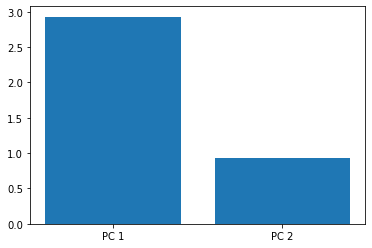

In [39]:
plt.bar(x=['PC 1', 'PC 2'], height=pca.explained_variance_)



#### Eigenvectors

This tells us how to map the original 4-dimensional data to 2!

In [40]:
pca.components_.T



array([[ 0.52237162,  0.37231836],
       [-0.26335492,  0.92555649],
       [ 0.58125401,  0.02109478],
       [ 0.56561105,  0.06541577]])

In [41]:
eigenvector_df = pd.DataFrame(data=pca.components_.T, columns=['PC 1', 'PC 2'], index=df.columns[:-1])



# Show the dataframe
eigenvector_df.head()

,PC 1,PC 2
sepal_length,0.522372,0.372318
sepal_width,-0.263355,0.925556
petal_length,0.581254,0.021095
petal_width,0.565611,0.065416


## Section 4: Visualize 2D Projection

Use a PCA projection to 2d to visualize the entire data set. You should plot different classes using different colors or shapes. Do the classes seem well-separated from each other? 

KeyError: 'PC 1'

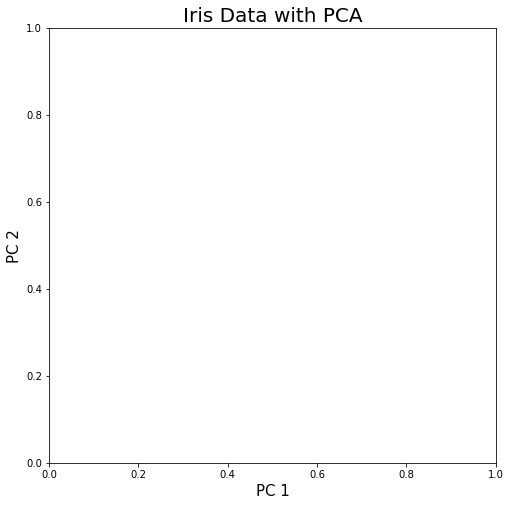

In [46]:
# Create figure and axis objects
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (8,8))

# Add labels and title to the axis
ax.set_xlabel('PC 1', fontsize = 15)
ax.set_ylabel('PC 2', fontsize = 15)
ax.set_title('Iris Data with PCA', fontsize = 20)

# Enumerate the iris types for legend
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']

# Enumerate the colors types for color coding
colors = ['r', 'g', 'b']

# For loop to plot for each iris kind

for (target, color) in zip(targets, colors):
    boolFilter = finalDf['target'] == target
    ax.scatter(finalDf[boolFilter]['PC 1'], 
               finalDf[boolFilter]['PC 2'], 
               c=color)




    
# Add lenged to axis at last
ax.legend(targets)

The three classes appear to be well separated! 

iris-virginica and iris-versicolor could be better separated, but still good!

## What are other applications of PCA (other than visualizing data)?

If your learning algorithm is too slow because the input dimension is too high, then using PCA to speed it up is a reasonable choice. You will see this in Homework 5 Facial Recognition. 

If memory or disk space is limited, PCA allows you to save space in exchange for losing a little of the data's information. This can be a reasonable tradeoff.

## What are the limitations of PCA? 

- PCA is not scale invariant. check: we need to scale our data first. 
- The directions with largest variance are assumed to be of the most interest 
- Only considers orthogonal transformations (rotations) of the original variables 
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not. 
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances. 

# Great Job!